In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
file_path = 'winequality-white.csv'
data = pd.read_csv(file_path, sep=';')

# Visualizar as primeiras linhas para entender a estrutura do dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


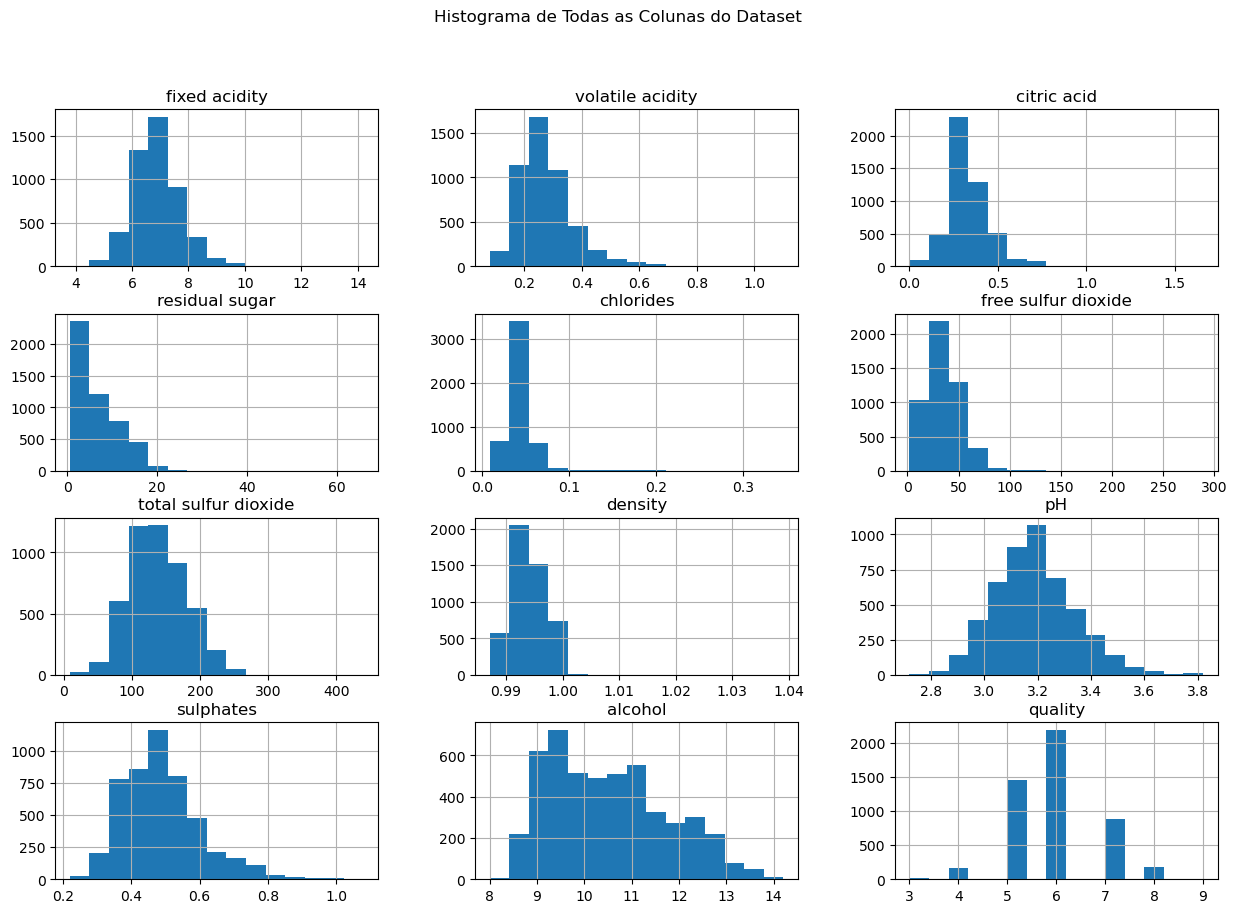

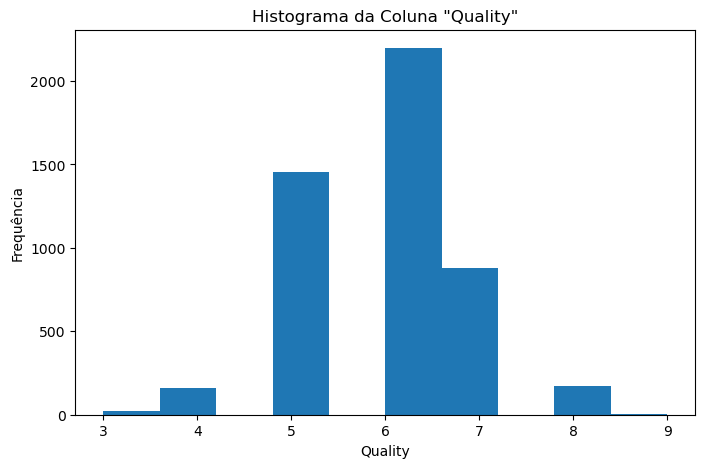

In [2]:
# Histograma para todas as colunas
data.hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograma de Todas as Colunas do Dataset')
plt.show()

# Histograma específico para a coluna "quality"
plt.figure(figsize=(8, 5))
data['quality'].hist(bins=10, grid=False)
plt.title('Histograma da Coluna "Quality"')
plt.xlabel('Quality')
plt.ylabel('Frequência')
plt.show()


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar valores ausentes
missing_values = data.isnull().sum()

# Separar os dados em features (X) e target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Normalizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

missing_values, X_train.shape, X_test.shape

(fixed acidity           0
 volatile acidity        0
 citric acid             0
 residual sugar          0
 chlorides               0
 free sulfur dioxide     0
 total sulfur dioxide    0
 density                 0
 pH                      0
 sulphates               0
 alcohol                 0
 quality                 0
 dtype: int64,
 (3673, 11),
 (1225, 11))

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# Treinar o modelo SVM
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Avaliar o modelo com validação cruzada no conjunto de treino
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)

# Previsões e avaliação no conjunto de teste
y_pred = svm_model.predict(X_test)
classification_report_test = classification_report(y_test, y_pred)
confusion_matrix_test = confusion_matrix(y_test, y_pred)

cv_scores.mean(), classification_report_test, confusion_matrix_test

C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jairo\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.5643893306641458,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         7\n           4       0.40      0.06      0.11        32\n           5       0.61      0.60      0.60       358\n           6       0.53      0.75      0.62       544\n           7       0.60      0.24      0.34       241\n           8       0.00      0.00      0.00        43\n\n    accuracy                           0.56      1225\n   macro avg       0.36      0.28      0.28      1225\nweighted avg       0.54      0.56      0.52      1225\n',
 array([[  0,   0,   2,   5,   0,   0],
        [  0,   2,  19,  11,   0,   0],
        [  0,   3, 214, 140,   1,   0],
        [  0,   0, 109, 410,  25,   0],
        [  0,   0,   8, 175,  57,   1],
        [  0,   0,   0,  31,  12,   0]], dtype=int64))

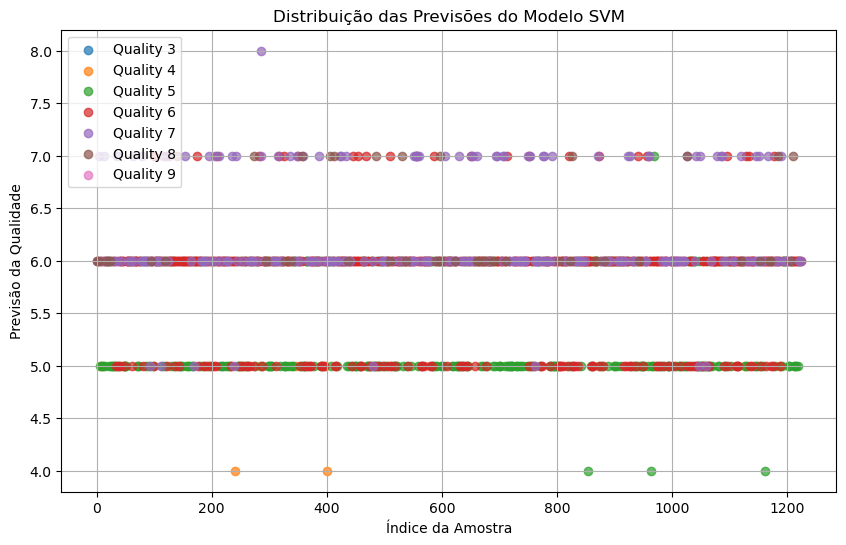

In [5]:
import numpy as np

# Criação do gráfico de dispersão das previsões
plt.figure(figsize=(10, 6))
classes = np.unique(y)
for cls in classes:
    idx = np.where(y_test == cls)
    plt.scatter(idx, y_pred[idx], label=f'Quality {cls}', alpha=0.7)

plt.xlabel('Índice da Amostra')
plt.ylabel('Previsão da Qualidade')
plt.title('Distribuição das Previsões do Modelo SVM')
plt.legend()
plt.grid(True)
plt.show()